# Run the whole deltas algorithm

In [98]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [99]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

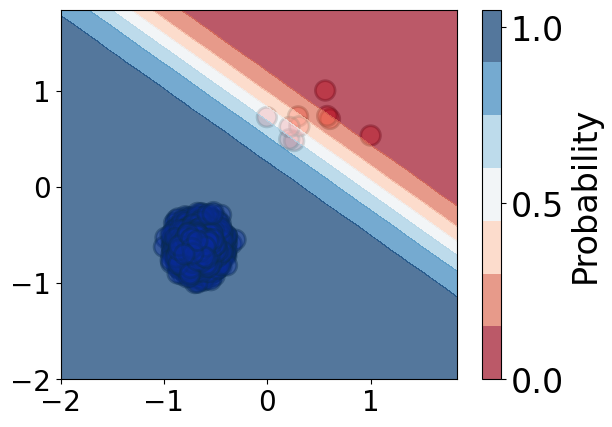

In [100]:
model = 'SVM'
model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [101]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.40146016]])

## Fit deltas

deltas init: [1, 0.9646104785708108]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.001001001001002 
    delta2: 0.9886773084293332
    constraint satisfied: True


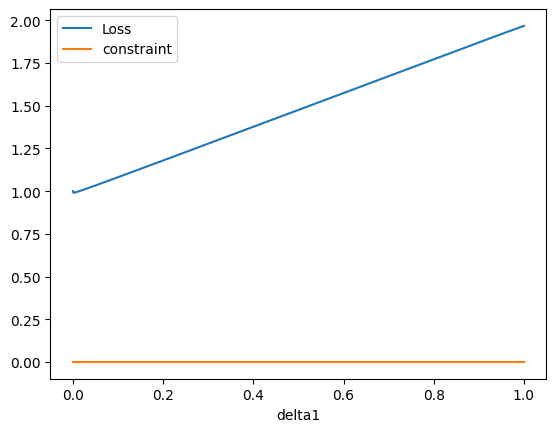

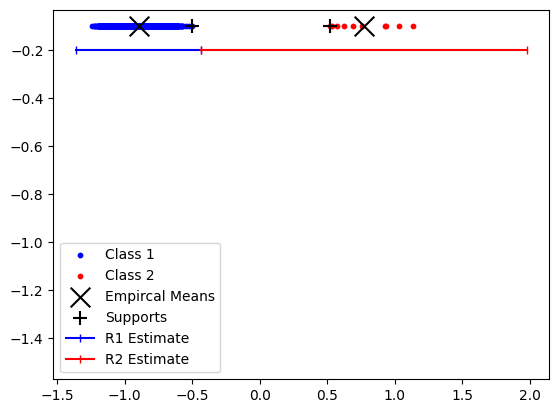

In [102]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_m = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

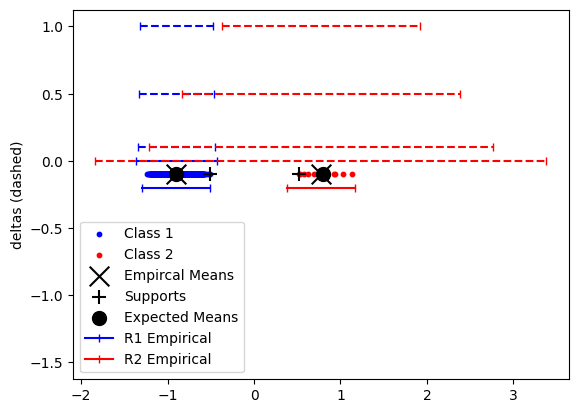

In [103]:
deltas_m.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [104]:
deltas_m.print_params()

Parameters
                R:  1.241759872306741
                N1: 10000
                N2: 10
                R1: 0.393185510332547
                R2: 0.3618698367145592
                M:  1.0254888834207863
                D:  1.670660486689139
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9261
deltas   accuracy: 1.0


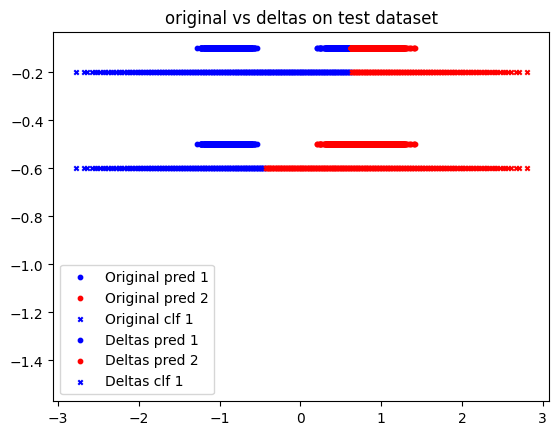

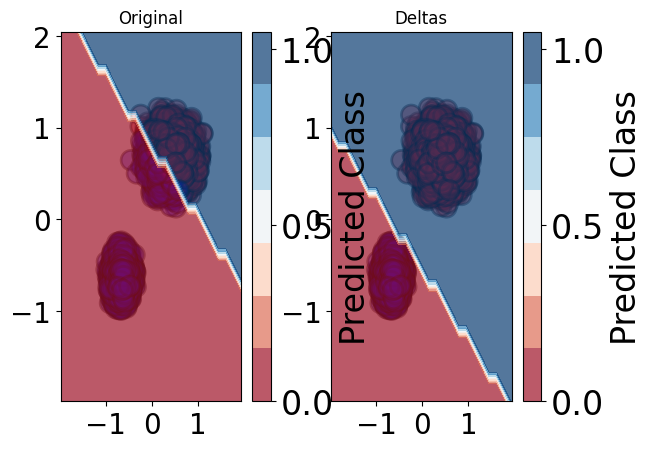

In [105]:
pipeline.eval_test_new(clf, deltas_m,
                       data_clf['data_test'], _print=True, _plot=True)